---

 ## **Predicting House Prices with Linear Regression**
 
 ### By Jayapriya Sreenivasan

---

#### **Introduction**

This project focuses on predicting house prices using linear regression based on features like area, bedrooms, bathrooms, and categorical variables such as air conditioning and furnishing status. Through Exploratory Data Analysis (EDA), we identify patterns and relationships between these features and house prices. After handling categorical variables and scaling the data, the linear regression model is trained and evaluated using metrics like Mean Squared Error (MSE) and R-squared. A residual analysis is performed to ensure the model's reliability, ultimately providing a data-driven approach to estimating real estate prices.


#### **About the Dataset**

The dataset used in this project consists of key information about various houses, containing both numerical and categorical features. Below is a breakdown of the features included:

**Numerical Features:**
+ **Area:** The square footage of the house.
+ **Bedrooms:** Number of bedrooms in the house.
+ **Bathrooms:** Number of bathrooms in the house.
+ **Stories:** Number of floors or stories in the house.
+ **Parking:** Number of parking spaces available.
**Categorical Features:**
+ **Mainroad:** Indicates if the house is located on a main road (Yes/No).
+ **Guestroom:** Specifies whether the house has a guestroom (Yes/No).
+ **Basement:** Whether the house has a basement (Yes/No).
+ **Hotwaterheating:** Indicates the availability of hot water heating (Yes/No).
+ **Airconditioning:** Whether the house has air conditioning (Yes/No).
+ **Prefarea:** Indicates if the house is located in a preferred area (Yes/No).
+ **Furnishingstatus:** The furnishing status of the house, with categories such as Furnished, Semi-Furnished, or Unfurnished.
**Target Variable:**
+ **Price:** The sale price of the house, which is the variable we aim to predict based on the features.

#### **Business Task**

The goal is to build a predictive model that estimates house prices based on features like area, bedrooms, bathrooms, and amenities. This helps stakeholders make informed decisions on pricing, investments, and market trends.

#### **Objective**

The objective is to leverage machine learning techniques, specifically linear regression, to accurately predict house prices. This involves data preprocessing, model training, and evaluation to ensure reliable and actionable insights for real estate decision-making.

#### **Data sources**

This dataset provided from [Housing Dataset](https://www.kaggle.com/code/ashydv/housing-price-prediction-linear-regression/input) The dataset is fictional and was created specifically for the purpose of conducting house price prediction analysis. The data spans the year 2023 and early 2024 and has been prepared to simulate real-world housing market conditions for predictive modeling.

#### **Limitations**

The dataset is fictional and may not fully represent real-world housing market complexities. Important factors like neighborhood quality and economic conditions are excluded. Additionally, the model's assumption of linear relationships may limit its ability to capture more complex pricing patterns.

--------


# __*Process*__

##### **Tools Used to process data:**

I used Visual Studio Code for running Python scripts for the data cleansing process.

##### **Steps involved in the Process**

* Load the Data: Import the dataset and necessary libraries.
* Clean the Data: Handle missing values, correct data types, and remove any outliers.
* Verify Data Integrity: Ensure that the dataset is accurate, consistent, and suitable for analysis.

In [30]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

1. Data Collection

In [31]:
# Loading the Datasets 

housing = pd.read_csv(r'C:\Users\chanv\OIBSIP\oibsip_task2\Housing.csv')

2. Data Cleaning

In [32]:
# Display the first few rows of the dataset

print("\nDataset Overview:\n")
print(housing.head())


Dataset Overview:

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [33]:
# Check for missing values

print("\nMissing Values:")
missing_values = housing.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("\nNo missing values\n")
else:
    print("\nMissing values\n")


Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

No missing values



In [34]:
# Remove rows with missing values:

if missing_values.sum() != 0:
    housing = housing.dropna()            # Drop rows with missing values
    print("Dropped rows with missing values.")
else:
    housing = housing
    print("\nNo missing values. Skipped dropna.\n")


No missing values. Skipped dropna.



In [35]:
# Checking for Duplicates:

print("\n", housing.duplicated().sum())


 0


In [36]:
# Display the housing info
print("\nData Columns and their Data Types:\n")
housing.info()



Data Columns and their Data Types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


------

##### **Steps taken for data cleansing**

* Missing Values: There are no missing values in the dataset. 
* Duplicate Data: There are no duplicates in the dataset.
* Data Types: Numeric columns have appropriate data types(int64).

-------

# __*Analysis and Visualization*__

Data is ready for Analysis.

##### **Key Tasks for Analysis & Visualization:**

1. **Descriptive Statistics:** Summarize the main features of the dataset (mean, median, standard deviation, etc.).
2. **Correlation Matrix:** Compute and visualize correlations between numerical features to identify relationships.
3. **Distribution Analysis:** Use histograms to visualize the distribution of numerical features.
4. **Boxplots for Outlier Detection:** Visualize the spread of numerical features and detect potential outliers.
5. **Scatter Plots:** Visualize relationships between key numerical features and the target variable (price).
6. **Categorical Analysis:** Use bar plots or count plots to analyze the distribution of categorical features.
7. **Feature Importance:** Analyze which features contribute most to the prediction.



3. Discriptive Statistics

In [37]:
# Display the Discriptive Statistics:

housing_summary = housing.describe()
print("\n Discriptive statistics for Housing Dataset ")
housing_summary


 Discriptive statistics for Housing Dataset 


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


4. Feature Selection & Data Exploration

In [38]:
# Feature Selection

numerical_features = housing.select_dtypes(include=[np.number]).columns.tolist() # all numerical fields in the dataset
print("\nNumerical Features Selected for Model:\n", numerical_features)

categorical_features = categorical_features = housing.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nCategorical Features Selected for Model:\n", categorical_features)



Numerical Features Selected for Model:
 ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

Categorical Features Selected for Model:
 ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


**Inference**

Feature selection is important because it ensures that the model uses only the most relevant and useful features, improving accuracy, reducing overfitting, speeding up computation, and making the model easier to interpret.

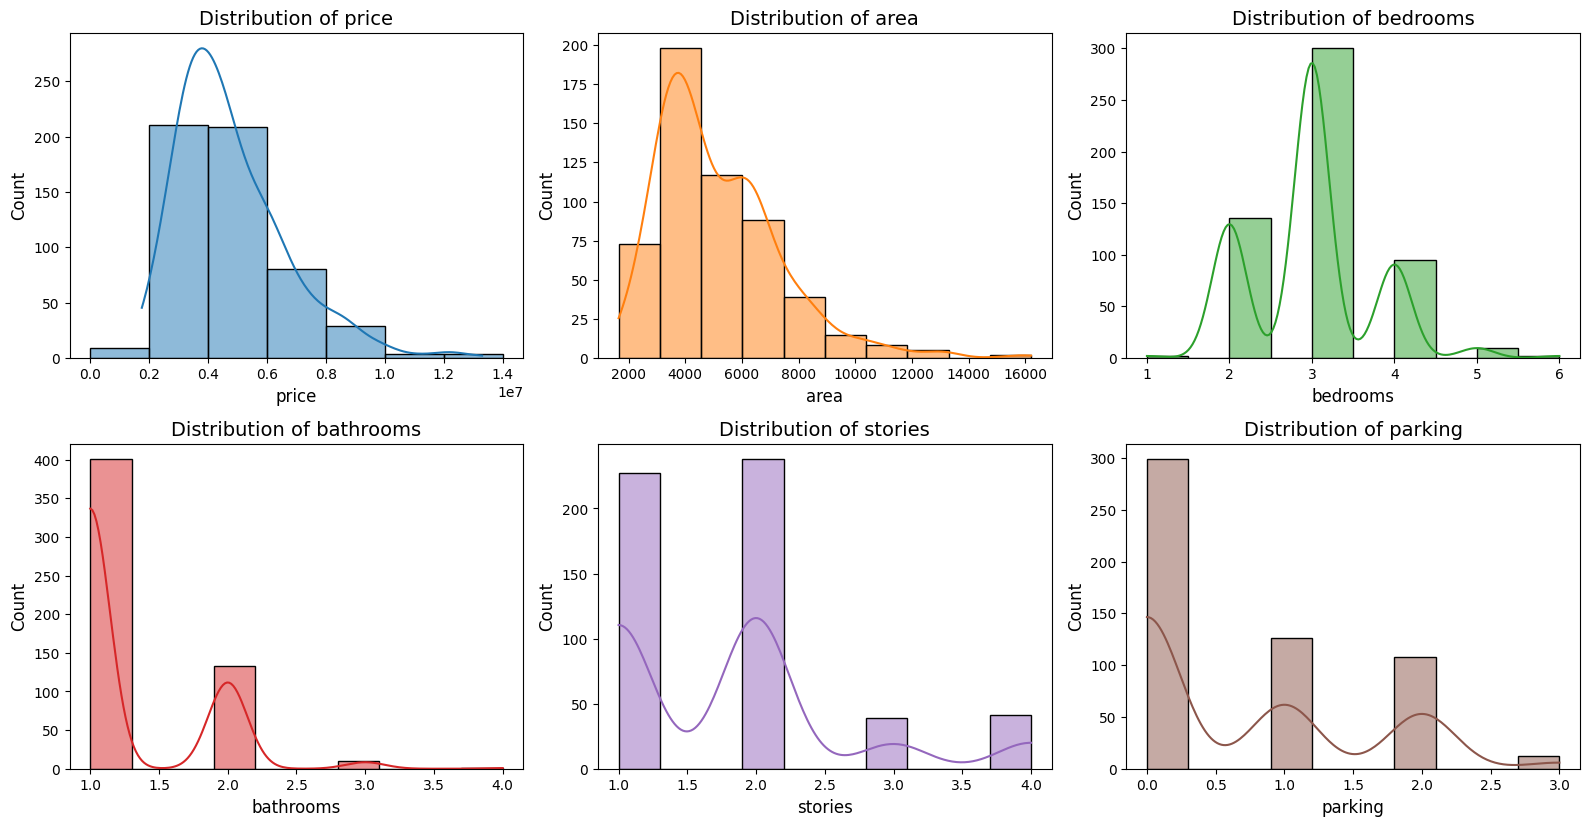

In [39]:
# Visualization using histograms for all numerical features for better understanding

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)  # Adjust layout for up to 9 features (3x3 grid)
    
    # Define bin_edges for each feature based on its range and set intervals
    if col == 'price':
        bin_edges = np.arange(0, housing['price'].max() + 2000000, 2000000)  # Bins every 2 million for price
    else:
        # Create bin ranges dynamically for other columns using an interval of ~10 bins
        bin_width = (housing[col].max() - housing[col].min()) / 10
        bin_edges = np.arange(housing[col].min(), housing[col].max() + bin_width, bin_width)
    
    # Plot histograms for each feature using the calculated bins
    sns.histplot(housing[col], bins=bin_edges, kde=True, color = colors[i])
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)

# Adjust layout and show the plot for all numerical features
plt.tight_layout()
plt.show()


**Inference**

+ **Price:** Approximately 80% of the houses are priced below 6 million.
         There are some outliers with prices exceeding 10 million.
+ **Area:** 75% of houses have an area between 2000 and 8000 sq ft, with the median around 4000 sq ft.
        A few large houses have areas exceeding 12,000 sq ft.
+ **Bedrooms:** 60% of the houses have 3 bedrooms, with 20% having 2 bedrooms and smaller fractions for other sizes.
+ **Bathrooms:** 65% of houses have 1 bathroom, and about 30% have 2 bathrooms.
             A very small percentage have more than 2 bathrooms, with 3-4 bathrooms being outliers.
+ **Stories:** 80% of the houses have 1-2 stories, with the majority having 2 stories.
           Fewer than 5% of the houses have 3 or more stories.
+ **Parking:** About 70% of the houses have 0-1 parking spots. Around 20% have 2 parking spots.
           Houses with 3 parking spots are rare, constituting less than 5%.
+ **Outliers:** In both price and area, there are a few high-end houses that act as outliers, representing less than 5% of the dataset.

 This indicates the dataset is dominated by standard residential houses with basic features.

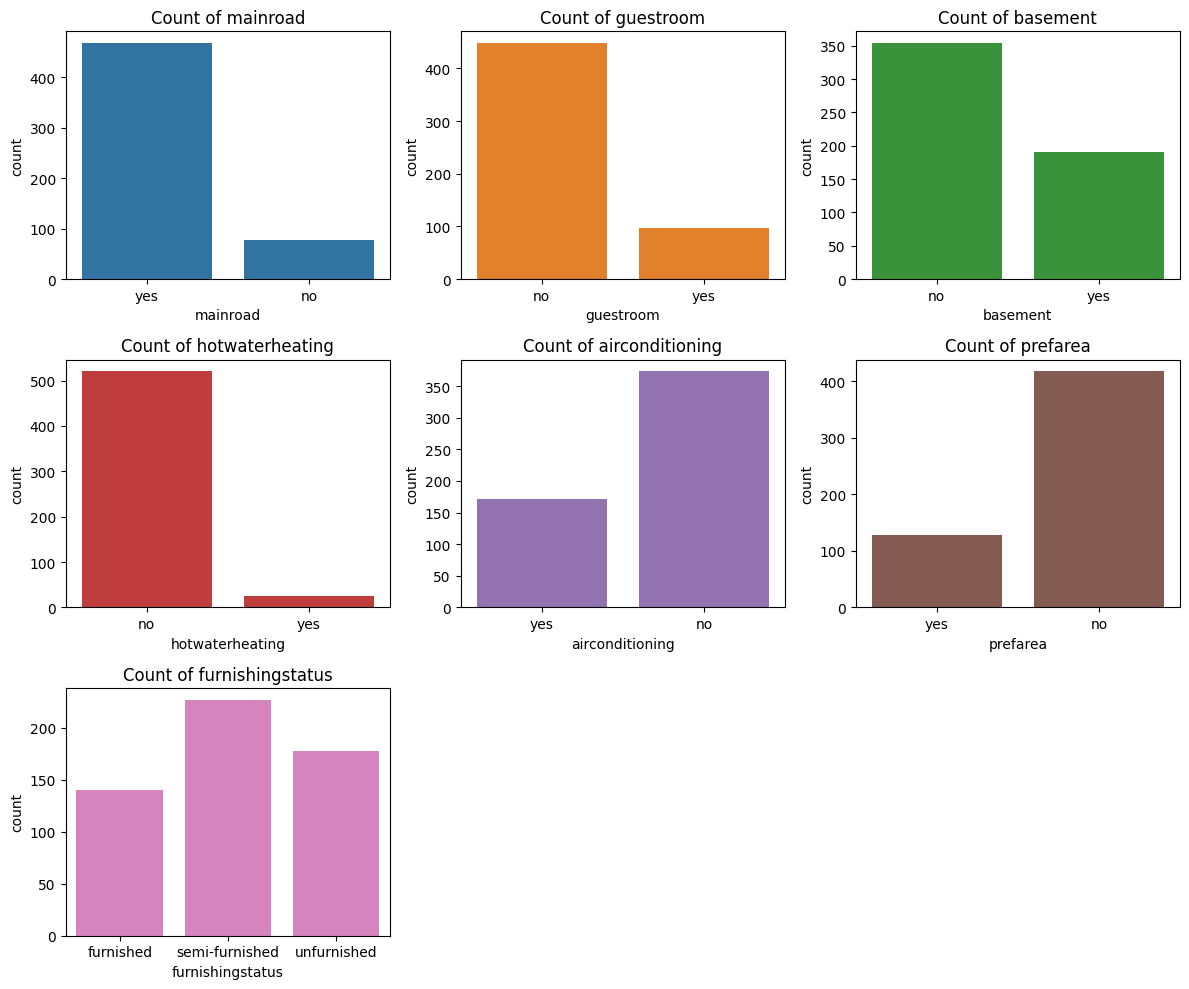

In [40]:
# Visualization using histograms for all categorical features for better understanding

plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns
    sns.countplot(x=housing[col], color=colors[i % len(colors)])  # Cycle through colors
    plt.title(f"Count of {col}")

plt.tight_layout()
plt.show()

**Inference**

+ Mainroad: Approximately 80% of the houses are accessible by main roads, while 20% are not.
+ Guestroom:Around 75% of the houses do not have a guestroom, with only 25% having one.
+ Basement:About 60% of the houses do not have a basement, while 40% do.
+ Hot Water Heating:90% of the houses do not have hot water heating, with only 10% equipped with it.
+ Air Conditioning:45% of the houses have air conditioning, while 55% do not.
+ Prefarea (Preferred Area):Around 80% of the houses are not in a preferred area, and 20% are.
+ Furnishing Status:40% of the houses are semi-furnished, 35% are unfurnished, and 25% are furnished.

This indicates that most houses have basic amenities like main road access, but advanced features like a guestroom, hot water heating, and preferred area locations are less common.

In [41]:
# Define the target variable (assumed to be 'price')

t_variable = 'price'  # Adjust according to your dataset column name
if t_variable not in housing.columns:
    t_variable = numerical_features[-1]  # Use last numerical column as target if unknown
print("\nTarget variable:", t_variable)



Target variable: price


**Inference:**

We take the target variable as price because the goal of the project is to predict house prices. In machine learning, the target variable (also called the dependent variable or label) is the variable that we aim to predict.

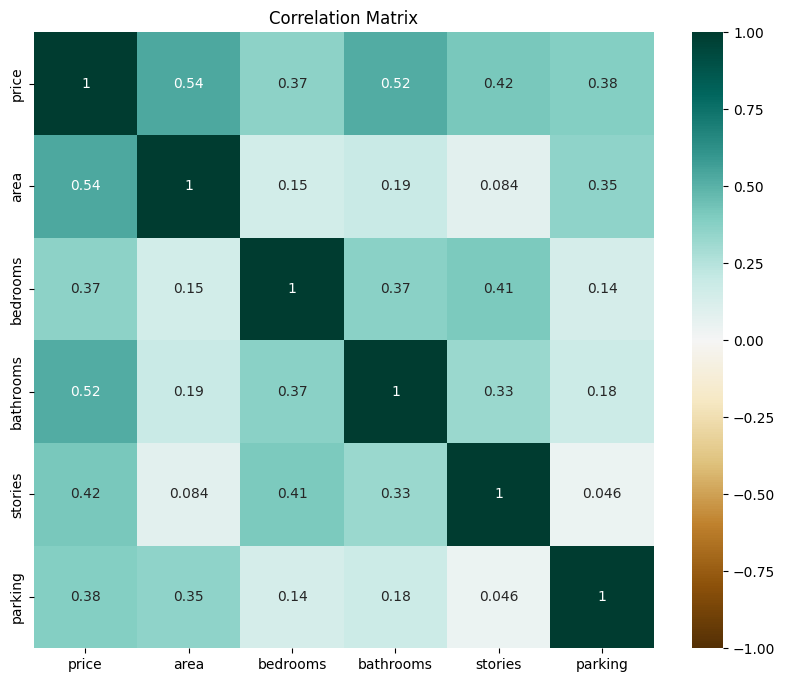


Correlation with price:
price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


In [42]:
# Calculate and plot correlation matrix

plt.figure(figsize=(10, 8))
correlation_matrix = housing.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Check the correlation of features with 'price'
print("\nCorrelation with price:")
print(correlation_matrix['price'].sort_values(ascending=False))

**Inference**

* Area (0.536): The area of the house has the highest positive correlation with price, meaning that as the area of the house increases, the price tends to increase. This makes sense, as larger homes typically cost more.

* Bathrooms (0.518): The number of bathrooms also shows a relatively strong positive correlation with price. Houses with more bathrooms generally have higher prices, as they are considered more luxurious or family-friendly.

* Stories (0.421): The number of stories has a moderate positive correlation with price, indicating that multi-story homes tend to be priced higher than single-story homes.

* Parking (0.384): The number of parking spots also has a moderate correlation with price. Houses with more parking space may have higher value, particularly in urban areas.

* Bedrooms (0.366): The number of bedrooms has the lowest correlation with price among these features. While more bedrooms can increase price, it appears to have a weaker relationship compared to other factors like area and bathrooms.

Features like area and bathrooms are the most influential on the house price, suggesting that larger homes with more facilities (bathrooms and multiple stories) are priced higher.
Bedrooms and parking contribute positively to the price but are not as strongly correlated compared to area and bathrooms.

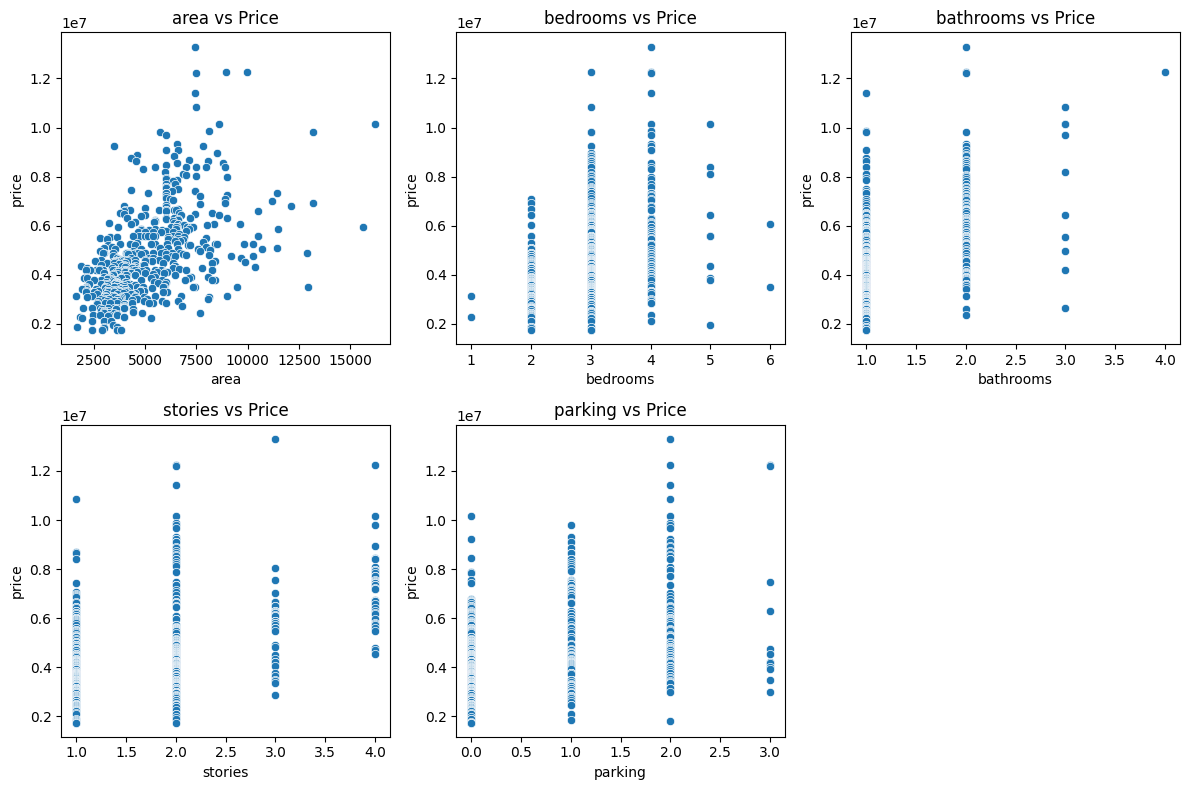

In [43]:
# Scatter plots to visualize relationships between numerical features and price

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features[1:]):  # Skipping 'price'
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=housing[col], y=housing['price'])
    plt.title(f"{col} vs Price")

plt.tight_layout()
plt.show()

**Inference**

+ Area vs Price: There is a clear positive correlation between area and price.
Larger areas (above 10,000 sq.ft) contribute to prices in range of 6 to 8 million, while areas around 4,000 - 6,000 sq.ft dominate the mid-range housing prices of 0.4 - 0.6 million.

+ Bedrooms vs Price: 3 bedrooms is the most common, accounting for approximately 60% of houses, with prices generally ranging from 0.3 to 0.6 million.
Houses with 4 or more bedrooms are outliers with prices above 1 million, contributing to around 10% of the data.

+ Bathrooms vs Price: 1 and 2 bathrooms dominate the dataset (around 80%), correlating with prices between 0.3 and 0.6 million.
More than 2 bathrooms is associated with higher prices, indicating luxury homes.

+ Stories vs Price: 1-2 stories cover around 90% of the dataset, with prices largely between 0.3 and 0.6 million.
3-4 story houses are few in number but linked to higher prices.

+ Parking vs Price: Houses with 1-2 parking spaces are most common (around 70%), correlating with prices between 0.3 to 0.6 million.
Houses with 3 parking spaces are rare, contributing to higher prices of above 1 million.

These insights confirm that the size of the house (area and number of rooms) and amenities like parking are significant factors influencing house prices.

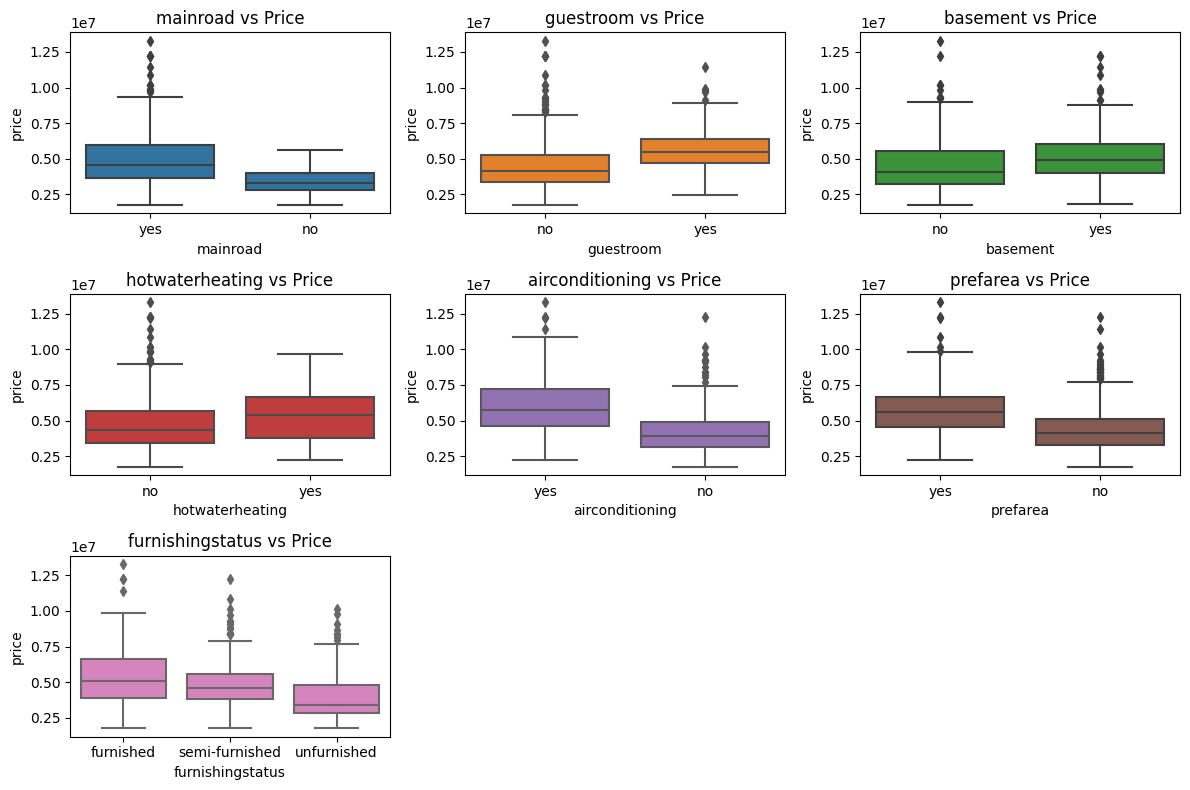

In [44]:
# Boxplots for categorical features vs price

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=housing[col], y=housing['price'], color = colors[i])
    plt.title(f"{col} vs Price")

plt.tight_layout()
plt.show()

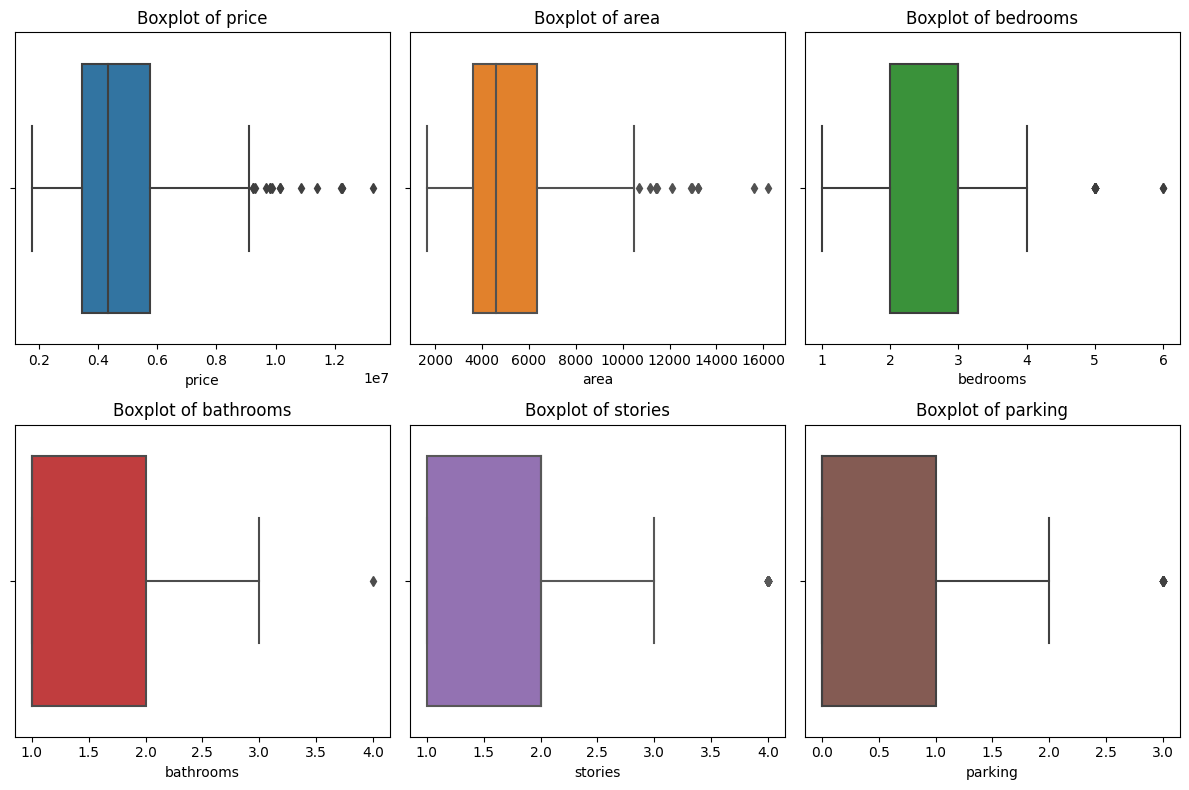

In [45]:
# Boxplots to identify outliers in numerical features

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=housing[col], color = colors [i])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


**Inference:**

1. Price: 50% of the house prices range between 3 to 6 million.                                         **Outliers:** Around 5% of the houses have prices above 8 million, indicating luxury homes.

+ Area: The interquartile range (IQR) for area is between 3,500 to 6,500 sq.ft, meaning 50% of houses fall within this range.
**Outliers:** 5-10% of houses have areas above 10,000 sq.ft, representing larger properties.

+ Bedrooms: Most houses have 2-3 bedrooms (about 80%).
**Outliers:** 2% of houses have more than 4 bedrooms, indicating premium or large family houses.

+ Bathrooms: 98% of houses have 1 to 2 bathrooms.
**Outliers:** About 2% of houses have 3 or more bathrooms, showing that larger homes have more bathrooms.

+ Stories: 85% of the houses have 1-2 stories.
**Outliers:** Only 7% of houses have 4 stories, suggesting taller residential buildings.

+ Parking: 98% of the houses have 0 to 2 parking spaces.
**Outliers:** Less than 2% of houses have 3 parking spaces, indicating rare premium housing options with ample parking.

These inferences provide a detailed breakdown of the housing features, showcasing the dominance of standard homes with occasional luxury outliers in price, area, and parking.

In [46]:
# Outliner Treatment using Z-scores

numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']  # Add any other numerical columns if present
z_scores = np.abs(stats.zscore(housing[numerical_columns])) # Calculate Z-scores 
threshold = 3   # 3 is common for outlier detection)

# removing rows where Z-scores are greater than the threshold
housing = housing[(z_scores < threshold).all(axis=1)]
print(f"Shape of the dataset after outlier removal: {housing.shape}")


Shape of the dataset after outlier removal: (522, 13)


**Inference:**

+ The dataset now contains 522 rows and 13 columns after outlier removal.
+ Outliers were identified and removed using the Z-score method, ensuring that only data points within the acceptable range (within 3 standard deviations from the mean) are retained.
+ The removal of outliers results in a cleaner dataset, reducing noise caused by extreme values, which can significantly improve model performance and provide more reliable insights during analysis.
+ The dataset is now likely to represent a more typical range of properties, focusing on standard residential features and removing anomalies such as extremely large homes or luxury-priced houses.

In [47]:
# Displaying first few rows on the dataset

print("\nFiltered Housing dataset outlier removal:\n")
housing.head()


Filtered Housing dataset outlier removal:



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
12,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished
13,9240000,3500,4,2,2,yes,no,no,yes,no,2,no,furnished
14,9240000,7800,3,2,2,yes,no,no,no,no,0,yes,semi-furnished


In [48]:
# Encoding the categorial fields to numbers(no = 0, yes = 1):

housing_encoded = pd.get_dummies(housing, columns=categorical_features, drop_first=True)
print("\nEncoded Housing dataset:\n")
housing_encoded. head()


Encoded Housing dataset:



,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
8,9870000,8100,4,1,2,2,1,1,1,0,1,1,0,0
9,9800000,5750,3,2,4,1,1,1,0,0,1,1,0,1
12,9310000,6550,4,2,2,1,1,0,0,0,1,1,1,0
13,9240000,3500,4,2,2,2,1,0,0,1,0,0,0,0
14,9240000,7800,3,2,2,0,1,0,0,0,0,1,1,0


**Inference:**

+ By converting categorical fields like mainroad, guestroom, basement, hotwaterheating, airconditioning, and prefarea into numerical values, we make the data suitable for machine learning algorithms, which require numerical inputs.
+ This process is essential to ensure that the categorical variables contribute meaningfully to the model’s predictions. Without encoding, the model would not be able to process these string values.

In [49]:
# Scaling

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
housing_encoded[numerical_columns] = scaler.fit_transform(housing_encoded[numerical_columns])
print(housing_encoded[numerical_columns].describe())

             area    bedrooms   bathrooms     stories     parking       price
count  522.000000  522.000000  522.000000  522.000000  522.000000  522.000000
mean     0.341719    0.482280    0.245211    0.265645    0.220307    0.354518
std      0.195735    0.176055    0.430625    0.290048    0.280519    0.203985
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.191131    0.250000    0.000000    0.000000    0.000000    0.206897
50%      0.290520    0.500000    0.000000    0.333333    0.000000    0.310345
75%      0.472834    0.500000    0.000000    0.333333    0.333333    0.474138
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000


**Inference:**

+ The MinMaxScaler changes all the data to fit between 0 and 1, keeping the original shape of the data but making the values easier to compare with each other.
+ This makes sure that no one feature has too much influence just because of its size, helping the machine learning model learn more effectively and quickly.

5. Model Training

In [50]:
# Prepare the features (X) and target (y)

X = housing_encoded.drop(columns=['price'])  # Dropping the target variable 'price' 
y = housing_encoded['price']  # The target variable is 'price'

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



**Inference:**

This step prepares the data for model training by separating the input features and the target variable (price). The 80-20 split ensures the model is trained on a majority of the data while preserving 20% to test its performance.

In [51]:
# Calculate evaluation metrics

model = LinearRegression()
model.fit(X_train, y_train)
print("Coefficients:", model.coef_)
print()
print("Intercept:", model.intercept_)


Coefficients: [ 0.28578814  0.04098874  0.09795011  0.17514073  0.06934358  0.04687583
  0.05889066  0.02707198  0.08046635  0.09604587  0.05121616  0.0051699
 -0.04668911]

Intercept: 0.05981378116944819


**Inference:**

+ **Coefficients:** The numbers tell us how much house price changes when a feature (like area or stories) changes. For example, increasing the area of a house increases its price the most (0.285), followed by having more stories (0.175) and more bathrooms (0.097). On the other hand, unfurnished houses tend to have slightly lower prices (-0.046).
+ **Intercept:** The intercept (0.059) is the starting price when all features are zero. It's just a baseline, not that meaningful in real life.
+ **Price**=(Coefficient1×Area)+(Coefficient2×Bedrooms)+⋯+(Intercept) is the general linear regression equation.

The model shows that area, stories, and bathrooms increase house prices the most, while unfurnished houses slightly lower the price. The intercept is just a baseline, and overall, the model gives a good understanding of how features impact prices.

6. Model Evaluation:

In [52]:
# Prediction on the test data

y_pred = model.predict(X_test)
print("\nFirst 10 Predictions:\n", y_pred[:10])


First 10 Predictions:
 [0.20536102 0.18578776 0.64761662 0.24425005 0.64697818 0.46803709
 0.20296624 0.12705573 0.38506807 0.39317794]


**Inference:**

+ The above output values are the predicted prices for 10 houses, but scaled between 0 and 1 due to the earlier scaling applied. The closer these predictions are to the actual values, the better the model's accuracy.

+ The model is making varied predictions for different house prices, showing its ability to predict both low and high house prices with the scaled data. 

In [53]:
# Evaluating the model's performance on a separate test dataset:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}\n")
print(f"\nR-squared: {r2:.2f}\n")


Mean Squared Error (MSE): 0.02


R-squared: 0.67



**Inference:**

+ **Mean Squared Error (MSE):** The MSE of 0.02 means that the model’s predictions are pretty close to the actual prices. The lower the MSE, the better.
+ **R-squared (0.67):** The R-squared value of 0.67 means the model explains 67% of why house prices change. This shows the model is doing a good job, but it’s not perfect — 33% is still unexplained.

The model predicts house prices well, with a low MSE and an R-squared of 0.67, meaning it explains half of the price variations. While it's fairly accurate, there's still some part left unexplained.

7. Visualization

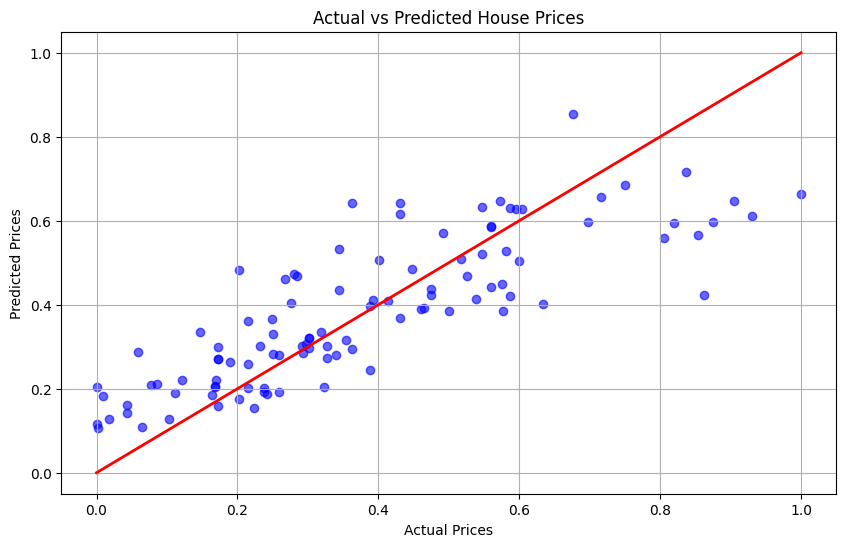


Model Coefficients:
                                 Coefficient
area                                0.285788
bedrooms                            0.040989
bathrooms                           0.097950
stories                             0.175141
parking                             0.069344
mainroad_yes                        0.046876
guestroom_yes                       0.058891
basement_yes                        0.027072
hotwaterheating_yes                 0.080466
airconditioning_yes                 0.096046
prefarea_yes                        0.051216
furnishingstatus_semi-furnished     0.005170
furnishingstatus_unfurnished       -0.046689


In [54]:
# Plot the actual vs predicted values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()

# Display the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients)

**Inference:**

+ Key Drivers of Price: Area has the biggest impact on price (28.6%), followed by stories, bathrooms, and features like air conditioning and hot water heating (around 8-9% each). Unfurnished homes are slightly cheaper by 4.7%.

+ Key Features: Larger homes with more bathrooms and stories have higher prices. Parking, guestroom, and mainroad access also increase the price by 4-6%. Unfurnished homes are priced lower.

+ Model Performance: The predicted prices are mostly close to actual prices, but with some deviations. The model explains 67% of price variation, but there's room for improvement.

Larger homes with more amenities cost more, while unfurnished homes are slightly cheaper. The model is fairly accurate but can be refined further.

8. Residual Analysis

In [55]:
# Predict on the training data to get the fitted values

y_train_pred = model.predict(X_train)

# Residuals: Difference between actual and predicted on the training set
residuals = y_train - y_train_pred


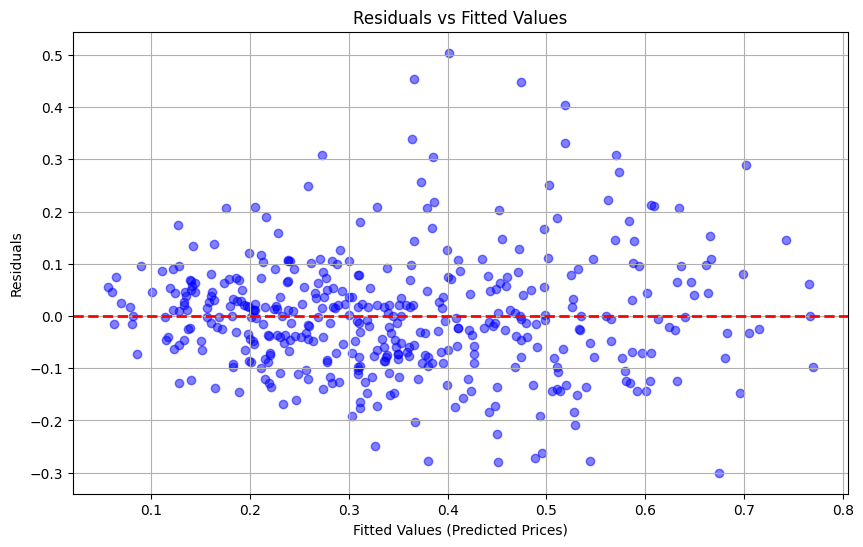

In [56]:

# Visualization using Scatter plot of Residuals vs Fitted Values

plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Fitted Values (Predicted Prices)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.grid(True)
plt.show()

**Inference:**

Residuals vs Fitted Values Plot:
The residuals are scattered around the red line (0), indicating that the model does not have a clear pattern of errors, which suggests it has made decent predictions. However, the spread is not entirely uniform, which indicates there are still some discrepancies, potentially due to unaccounted factors or outliers.

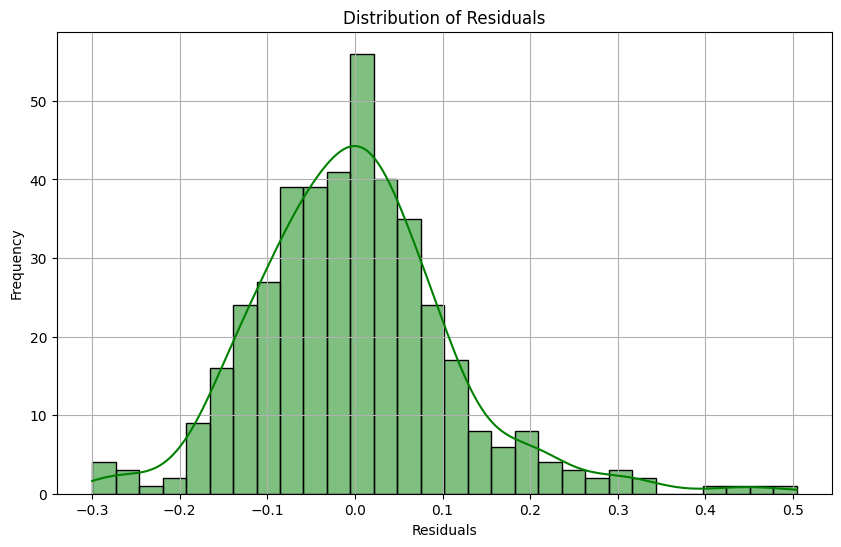

In [57]:
# Visualization using Histogram of Distribution of Residuals:

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='green')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Inference:**

Distribution of Residuals Plot:
The distribution of residuals resembles a normal distribution, with most errors close to 0. This is a good sign, indicating that the model is generally predicting well, although there are a few outliers on both sides where predictions deviate from actual values.

Both plots indicate that the model is performing fairly well, with residuals centered around zero and distributed normally, though there is still room for improvement.

-------

#### **Overall Insights:**

1. **Key Features Impacting Price:**
+ **Area** has the largest positive impact on price, contributing to a 28.6% increase in price with every unit increase (after scaling).
+ **Stories** and **bathrooms** contribute 17.5% and 9.8%, respectively, suggesting homes with more stories and bathrooms have higher prices.
+ **Air conditioning** and **hot water heating** add about 9.6% and 8.0% to the price when present.
+ **Unfurnished homes** see a 4.7% decrease in price compared to **semi-furnished** ones.
+ Based on the model coefficients, the formula to predict the house price is:

  **Price**= 0.2858×Area+0.0410×Bedrooms+0.0979×Bathrooms+0.1751×Stories+0.0693×Parking+0.0469×Mainroad_Yes+
  0.0589×Guestroom_Yes+0.0271×Basement_Yes+0.0805×HotWaterHeating_Yes+0.0960×AirConditioning_Yes+
  0.0512×Prefarea_Yes+0.0052×FurnishingStatus_SemiFurnished−0.0467×FurnishingStatus_Unfurnished+0.0598

2. **R-squared Value:**
+ The model explains 67% of the variance in house prices. This indicates the model is relatively strong but leaves 33% of variability unexplained, possibly due to missing features or other external factors.

3. **Residuals Analysis:**
+ Residuals show no major patterns and are mostly centered around 0, meaning the model’s predictions are generally good, with few large prediction errors.

4. **Outliers:**
+ A few houses with higher prices and larger areas act as outliers, slightly impacting the model's accuracy.


#### **Recommendations:**

1. Focus on Area and Stories: To improve property values, focus on expanding the area and increasing the number of stories, as these have the highest positive impact on price.

2. Consider Adding Air Conditioning and Bathrooms: These features are shown to significantly increase property prices, and investing in them can lead to higher returns.

3. Furnishing Homes: Unfurnished homes have lower prices; thus, consider offering semi-furnished or fully furnished homes to maximize value.

4. Address Outliers: Since outliers affect model accuracy, further analysis of high-end or exceptionally large properties is recommended to refine pricing strategies.

5. Further Data: To improve prediction accuracy, consider collecting additional data on factors like location or market trends, which might explain the remaining 33% of price variance.

--------------